## Example Linear regression

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import tensorflow as tf

In [37]:
x_data = np.linspace(0.0,10.0,1000000)

In [38]:
noise = np.random.randn(len(x_data))

In [39]:
noise

array([ 0.96708266, -0.35741665, -0.0336791 , ..., -0.39135382,
        0.99233187,  1.50312975])

In [40]:
y_true = (0.5*x_data)+5+noise

In [41]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])

In [42]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [43]:
y_df.head()

,Y
0,5.967083
1,4.642588
2,4.966331
3,4.717553
4,5.597719


In [44]:
my_data=pd.concat([x_df,y_df],axis=1)

In [45]:
my_data.head()

,X Data,Y
0,0.00000,5.967083
1,0.00001,4.642588
2,0.00002,4.966331
3,0.00003,4.717553
4,0.00004,5.597719


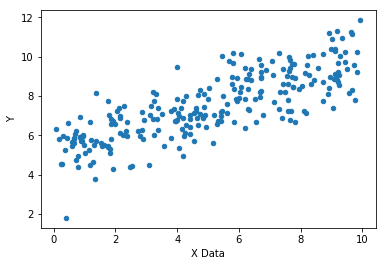

In [46]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [47]:
batch_size=8

In [48]:
m=tf.Variable(0.81)
b=tf.Variable(0.17)

In [49]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [50]:
y_model = m*xph + b

In [65]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [85]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [86]:
init = tf.global_variables_initializer()

In [87]:
with tf.Session() as sess:
    sess.run(init)
    batches=10000
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])

In [88]:
model_m

0.5168225

In [89]:
model_b

4.9429016

In [90]:
y_hat = x_data*model_m + model_b

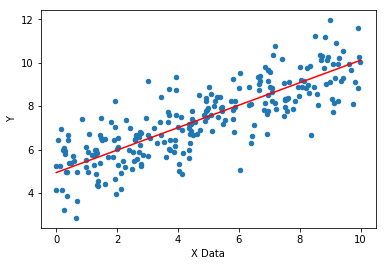

In [91]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')